<a href="https://colab.research.google.com/github/elifftosunn/Bert-Bank-Model/blob/main/multiTextClassiffication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Multi-Class Text Classification for make-up products using Doc2Vec 
Multi-Class Text Classification to make-up products based on their description and categories by using Doc2Vec vectors.

Doc2vec is a method of vector representation of entire documents, not individual words. By document, you can mean a single sentence, paragraph, or an entire book. Doc2Vec architecture has two algorithms. One of the them is called Distributed Bag of Words (DBOW). The second algorithm is “distributed memory” (DM).

In this project, we used Doc2Vec to get the document vectors and we used as input to the classification model.

# Importing packages and loading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
from time import time
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datas/cleanBankData.csv")
df

,Unnamed: 0,id,target,username,text
0,0.0,0.0,Diğer,Elif,vatan telefon kredi iç başvurmak kredi başvuru...
1,1.0,5.0,Diğer,Elif,banka bulmak sicil kayıt 01102022 tarihî çıkma...
2,2.0,6.0,Diğer,Elif,07102022 yürümek girmek kanun ilmek madde tari...
3,3.0,7.0,Diğer,Elif,türkiye faaliyet göstermek devlet özel banka n...
4,4.0,8.0,Diğer,Elif,vakıfbank swift ücret 2500 para kesmek insan ş...
...,...,...,...,...,...
641,642.0,5623.0,Hesap İşlemleri,Mina,ben bor bitmek 07102022 tarihî icra olmak bank...
642,643.0,6923.0,Hesap İşlemleri,Zeycan,ptt ara ilmek kredi çek 1 ay iç ödemek promosy...
643,644.0,12652.0,KKB Skor,Mina,yapı kredi world kart 05062022de yansımak 216 ...
644,645.0,13077.0,Kart İşlemleri,Zeycan,NaN


In [ ]:
# birey banka sicil af kanun dâhi 07102022de yürümek girmek kanun ilmek madde tarih 5411 sayılı kanun 1 madde uyarı karşı çek protesto senet ilmek kredi kredi kart borç ilişki kayıt dikkat alınmak hakkında kanun aşağı geçici mad
df.loc[df.text == "birey banka sicil af kanun dâhi 07102022de yürümek girmek kanun ilmek madde tarih 5411 sayılı kanun 1 madde uyarı karşı çek protesto senet ilmek kredi kredi kart borç ilişki kayıt dikkat alınmak hakkında kanun aşağı geçici mad"]
deleteRows = df.loc[(df.text == "birey banka sicil af kanun dâhi 07102022de yürümek girmek kanun ilmek madde tarih 5411 sayılı kanun 1 madde uyarı karşı çek protesto senet ilmek kredi kredi kart borç ilişki kayıt dikkat alınmak hakkında kanun aşağı geçici mad") & (df.target == "Diğer")]
deleteRows

,Unnamed: 0,id,target,username,text
488,489.0,839.0,Diğer,Zeycan,birey banka sicil af kanun dâhi 07102022de yür...
494,495.0,848.0,Diğer,Zeycan,birey banka sicil af kanun dâhi 07102022de yür...
545,546.0,931.0,Diğer,Elif,birey banka sicil af kanun dâhi 07102022de yür...


In [ ]:
df = df.drop([488, 494, 545], axis = 0)
df

,Unnamed: 0,id,target,username,text
0,0.0,0.0,Diğer,Elif,vatan telefon kredi iç başvurmak kredi başvuru...
1,1.0,5.0,Diğer,Elif,banka bulmak sicil kayıt 01102022 tarihî çıkma...
2,2.0,6.0,Diğer,Elif,07102022 yürümek girmek kanun ilmek madde tari...
3,3.0,7.0,Diğer,Elif,türkiye faaliyet göstermek devlet özel banka n...
4,4.0,8.0,Diğer,Elif,vakıfbank swift ücret 2500 para kesmek insan ş...
...,...,...,...,...,...
641,642.0,5623.0,Hesap İşlemleri,Mina,ben bor bitmek 07102022 tarihî icra olmak bank...
642,643.0,6923.0,Hesap İşlemleri,Zeycan,ptt ara ilmek kredi çek 1 ay iç ödemek promosy...
643,644.0,12652.0,KKB Skor,Mina,yapı kredi world kart 05062022de yansımak 216 ...
644,645.0,13077.0,Kart İşlemleri,Zeycan,NaN


In [ ]:
df.to_csv("/content/drive/MyDrive/datas/cleanBankData.csv", index= False)

In [ ]:
df.isnull().sum()

Unnamed: 0    1
id            1
target        1
username      1
text          1
dtype: int64

In [ ]:
df = df.dropna(axis = 0)
df.isnull().sum()

Unnamed: 0    0
id            0
target        0
username      0
text          0
dtype: int64

In [ ]:
df = df.drop(["id","username","Unnamed: 0"], axis = 1)
df.head()

,target,text
0,Diğer,vatan telefon kredi iç başvurmak kredi başvuru...
1,Diğer,banka bulmak sicil kayıt 01102022 tarihî çıkma...
2,Diğer,07102022 yürümek girmek kanun ilmek madde tari...
3,Diğer,türkiye faaliyet göstermek devlet özel banka n...
4,Diğer,vakıfbank swift ücret 2500 para kesmek insan ş...


In [ ]:
df.target.value_counts()

Hesap İşlemleri                   137
KKB Skor                          124
Kart İşlemleri                    110
Diğer                              73
Kredi İşlemleri                    72
Müşteri Temsilcisi                 55
Kargo                              51
Limit(Hesap, KMH, Kredi Kartı)     19
Name: target, dtype: int64

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
train_tag = train.apply(lambda x: TaggedDocument(words=word_tokenize(x['text']), tags=[x.target]), axis=1)
test_tag = test.apply(lambda x: TaggedDocument(words=word_tokenize(x['text']), tags=[x.target]), axis=1)

In [ ]:
train_tag

208    ([iş, banka, bank, kart, kaymak, kaynak, yen, ...
9      ([papara, hesap, para, yüklemek, iç, hesap, ba...
526    ([1, yılmak, enparacomla, çalışıyorum, herhang...
404    ([son, 3288, ilmek, bitmek, bankkart, gold, mc...
350    ([enparada, kurmak, korumak, vade, mevduat, he...
                             ...                        
71     ([exxen, bilgi, dış, para, çekilmek, müşteri, ...
106    ([bugün, iş, banka, ihtiyaç, kredi, kredi, baş...
270    ([birey, banka, sicil, af, kanun, dâhi, 071020...
435    ([müşteri, hizmet, f, kart, kapamak, havale, m...
102    ([birey, banka, sicil, af, kanun, dâhi, 071020...
Length: 448, dtype: object

In [ ]:
train_tag[400]

TaggedDocument(words=['birey', 'banka', 'sicil', 'af', 'kanun', 'dâhi', '07102022', 'yürümek', 'girmek', 'kanun', 'ilmek', 'madde', 'tarih', '5411', 'sayılı', 'kanun', '1', 'madde', 'uyarı', 'karşı', 'çek', 'protesto', 'senet', 'ilmek', 'kredi', 'kredi', 'kart', 'borç', 'ilişki', 'kayıt', 'dikkat', 'alınmak', 'hakkında', 'kanun', 'aşağı', 'geçici', 'mad'], tags=['Kart İşlemleri'])

#  Getting the feature vector from doc2vec model 
In this step we initialize the gensim doc2vec model. Doc2Vec architecture is also similar to word2vec and has two algorithms like word2vec and they are the corresponding algorithms for those two algorithms. One of the them is called Distributed Bag of Words (DBOW) which is similar to “Skip-gram” (SG) model in word2vec except that additional paragraph id vector is added. The second algorithm is “distributed memory” (DM) which is similar to “Continuous bag of words” CBOW in word vector.

# Distributed Bag of Words (DBOW)
First, we instantiate a doc2vec model — Distributed Bag of Words (DBOW). We set the following parameters:

- dm=0 , distributed bag of words (DBOW) is used;
- vector_size = 100, word embeddings will have shape of;
- window = 2, model will try to predict every second word;
- sample=0 , the threshold for configuring which higher-frequency words are - randomly down sampled;
- min_count=2, ignores all words with total frequency lower than this.

In [ ]:
doc_model = Doc2Vec(dm=0, vector_size=100, min_count=2, window=2, sample = 0)
               
doc_model.build_vocab(train_tag)

In [ ]:
doc_model.corpus_total_words

15798

In [ ]:
%time doc_model.train(train_tag, total_examples=doc_model.corpus_count, epochs=30) 

CPU times: user 1.29 s, sys: 61.9 ms, total: 1.36 s
Wall time: 957 ms


In [ ]:
doc_model.most_similar('kredi')

<ipython-input-26-0193b5a185c2>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  doc_model.most_similar('kredi')


[('agt', 0.29740089178085327),
 ('findeks', 0.2900507152080536),
 ('sek', 0.28870928287506104),
 ('nfc', 0.2850169241428375),
 ('sorumak', 0.28180384635925293),
 ('kaza', 0.2769043445587158),
 ('uygun', 0.25099897384643555),
 ('elde', 0.23874403536319733),
 ('gönderilmedi', 0.23541449010372162),
 ('bilgilenmek', 0.23111969232559204)]

In [ ]:
#save model
doc_model.save('/content/drive/MyDrive/models/model.doc2vec')

In [ ]:
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, feature_vectors

In [ ]:

y_train, X_train = vector_for_learning(doc_model, train_tag)
y_test, X_test = vector_for_learning(doc_model, test_tag)

# Training the Classifier
We choose Logistic Regression Classifier and Linear Support Vector Machine.

*Logistic Regression with DBOW*

In [ ]:
log_reg = LogisticRegression(n_jobs=1, C=5)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Testing accuracy %s' % accuracy_score(y_pred, y_test))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.19689119170984457
Testing F1 score: 0.1884641133830912


In [ ]:

ytest = np.array(y_test)
print(classification_report(ytest, y_pred))

                                precision    recall  f1-score   support

                         Diğer       0.14      0.17      0.15        24
               Hesap İşlemleri       0.27      0.30      0.28        43
                      KKB Skor       0.16      0.17      0.16        35
                         Kargo       0.15      0.17      0.16        12
                Kart İşlemleri       0.23      0.27      0.25        33
               Kredi İşlemleri       0.19      0.16      0.17        19
Limit(Hesap, KMH, Kredi Kartı)       0.00      0.00      0.00         8
            Müşteri Temsilcisi       0.14      0.05      0.08        19

                      accuracy                           0.20       193
                     macro avg       0.16      0.16      0.16       193
                  weighted avg       0.19      0.20      0.19       193



In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [ ]:
preds = svm.predict(X_test)
print('Testing accuracy %s' % accuracy_score(preds, y_test))
print('Testing F1 score: {}'.format(f1_score(y_test, preds, average='weighted')))

Testing accuracy 0.20207253886010362
Testing F1 score: 0.1915555867678797


In [ ]:
print(classification_report(ytest, preds))

                                precision    recall  f1-score   support

                         Diğer       0.18      0.21      0.19        24
               Hesap İşlemleri       0.27      0.33      0.29        43
                      KKB Skor       0.15      0.14      0.14        35
                         Kargo       0.17      0.17      0.17        12
                Kart İşlemleri       0.25      0.27      0.26        33
               Kredi İşlemleri       0.21      0.21      0.21        19
Limit(Hesap, KMH, Kredi Kartı)       0.00      0.00      0.00         8
            Müşteri Temsilcisi       0.00      0.00      0.00        19

                      accuracy                           0.20       193
                     macro avg       0.15      0.17      0.16       193
                  weighted avg       0.18      0.20      0.19       193



In [ ]:

dm_model = Doc2Vec(dm=1, vector_size=100, min_count=2, window=2, sample = 0, negative=5, alpha=0.025, min_alpha=0.001)
dm_model.build_vocab(train_tag)

In [ ]:
dm_model.corpus_total_words

15798

In [ ]:
%time dm_model.train(train_tag, total_examples=dm_model.corpus_count, epochs=30) 

CPU times: user 2.22 s, sys: 207 ms, total: 2.43 s
Wall time: 1.72 s


In [ ]:
dm_model.save('/content/drive/MyDrive/models/dm_model.doc2vec')

In [ ]:
y_train_dm, X_train_dm = vector_for_learning(dm_model, train_tag)
y_test_dm, X_test_dm = vector_for_learning(dm_model, test_tag)

In [ ]:
log_reg = LogisticRegression(n_jobs=1, C=5)
log_reg.fit(X_train_dm, y_train_dm)
pred = log_reg.predict(X_test_dm)

print('Testing accuracy %s' % accuracy_score(y_test_dm, pred))
print('Testing F1 score: {}'.format(f1_score(y_test_dm, pred, average='weighted')))

Testing accuracy 0.19170984455958548
Testing F1 score: 0.1818533116364134


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
ytest = np.array(y_test_dm)
print(classification_report(ytest, pred))

                                precision    recall  f1-score   support

                         Diğer       0.15      0.12      0.14        24
               Hesap İşlemleri       0.26      0.23      0.24        43
                      KKB Skor       0.20      0.26      0.22        35
                         Kargo       0.14      0.17      0.15        12
                Kart İşlemleri       0.21      0.27      0.24        33
               Kredi İşlemleri       0.20      0.21      0.21        19
Limit(Hesap, KMH, Kredi Kartı)       0.00      0.00      0.00         8
            Müşteri Temsilcisi       0.00      0.00      0.00        19

                      accuracy                           0.19       193
                     macro avg       0.14      0.16      0.15       193
                  weighted avg       0.18      0.19      0.18       193



In [ ]:
svm = LinearSVC()
svm.fit(X_train_dm, y_train_dm)
pred_y = svm.predict(X_test_dm)

In [ ]:
print('Testing accuracy %s' % accuracy_score(pred_y, y_test_dm))
print('Testing F1 score: {}'.format(f1_score(y_test_dm, pred_y, average='weighted')))

Testing accuracy 0.20207253886010362
Testing F1 score: 0.1973015018968177


In [ ]:
print(classification_report(ytest, pred_y))

                                precision    recall  f1-score   support

                         Diğer       0.12      0.12      0.12        24
               Hesap İşlemleri       0.26      0.26      0.26        43
                      KKB Skor       0.20      0.23      0.21        35
                         Kargo       0.09      0.08      0.09        12
                Kart İşlemleri       0.21      0.24      0.22        33
               Kredi İşlemleri       0.24      0.26      0.25        19
Limit(Hesap, KMH, Kredi Kartı)       0.00      0.00      0.00         8
            Müşteri Temsilcisi       0.21      0.16      0.18        19

                      accuracy                           0.20       193
                     macro avg       0.17      0.17      0.17       193
                  weighted avg       0.19      0.20      0.20       193




-------------------------------------------------------------------------------------------
### SECOND METHOD -- BERT MODEL
-------------------------------------------------------------------------------------------

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 18.3 MB/s eta 0:00:00


In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import torch
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig, Adafactor
from transformers import get_linear_schedule_with_warmup
import datetime
import random
import seaborn as sns
import numpy as np
import time
import matplotlib.pyplot as plt


from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-128k-uncased', do_lower_case=True)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datas/cleanBankData2.csv")

In [ ]:
df.groupby("label").size()

label
Diğer                 36626
Hesap İşlemleri       36504
KKB Skor              12622
Kargo                 35392
Kart İşlemleri        37296
Kredi İşlemleri       36904
Limit                 30802
Müşteri Temsilcisi    20266
dtype: int64

In [ ]:
le = LabelEncoder()
df.label = le.fit_transform(df.label)
df.head()

,name,link,label,text
0,MOOV Mov Uyarı Vermeden Kısıtlama Getirdi,https://www.sikayetvar.com/moov/moov-mov-uyari...,5,moov ad araç kiralamak şirket sürek araç kiral...
1,Ziraat Bankası Bankkart Arka Yüzündeki Kredi K...,https://www.sikayetvar.com/ziraat-bankasi/zira...,5,ziraat banka bankkart kart kredi kart alışveri...
2,Hepsiburada.com Sipariş İptaliyle 500 TL Zarar...,https://www.sikayetvar.com/hepsiburada/hepsibu...,5,22 ara 2022 tarih hepsiburadacomdan yapmak 475...
3,Ziraat Bankası Borç Ödeme Sorunu,https://www.sikayetvar.com/ziraat-bankasi/zira...,5,banka kart par olmak rağmen kredi kart bor öde...
4,Ziraat Bankası Bloke Açma Sorunu,https://www.sikayetvar.com/ziraat-bankasi/zira...,5,ziraat banka kredi bor dolay hesap bloke koyma...


In [ ]:
df['text'] = df['name'] + ". " + df['text']

In [ ]:
training = df.groupby('label').apply(lambda x : x.sample(frac = 0.8))
test = pd.concat([df,training]).drop_duplicates(keep=False)
result = test.groupby('text')['label'].count().sum()
result

17115

In [ ]:
training

name  \
label                                                             
0     164292  English Home İadede Haksızlığa Ve Aşağılamaya ...   
      77727   T.C. Cumhurbaşkanlığı İmam Hatip Ortaokulu'na ...   
      76376     A101  İndirimde Olan Şampuanı Haftaya Diyorlar!   
      73760         Hepsiburada Puma Marka Ayakkabı Mağduriyeti   
      72813           Ziraat Banka Kartı Kuryenet Sorumsuzluğu!   
...                                                         ...   
7     141187         Dyo Boya  Teknotex Boya 1 Yılda Küf Yaptı!   
      39237         Çiçek Sepeti Hesabımdan Para Çekimi Yapıldı   
      143163                     Garanti Bankası Hizmet Kusuru!   
      37958   Türkiye Hayat Emeklilik Vefat Nedeniyle Kapatı...   
      137701                        Enza Home Servis Bekliyoruz   

                                                           link  label  \
label                                                                    
0     164292  https://www.sikayetvar.com/english-home/englis...      0   
      77727   https://www.sikayetvar.com/tc-cumhurbaskanligi...      0   
      76376   https://www.sikayetvar.com/a101/a101-indirimde...      0   
      73760   https://www.sikayetvar.com/hepsiburada/hepsibu...      0   
      72813   https://www.sikayetvar.com/kuryenet/ziraat-ban...      0   
...                                                         ...    ...   
7     141187  https://www.sikayetvar.com/dyo-boya/dyo-boyate...      7   
      39237   https://www.sikayetvar.com/ciceksepeti/cicek-s...      7   
      143163  https://www.sikayetvar.com/garanti-bbva/garant...      7   
      37958   https://www.sikayetvar.com/turkiye-hayat-emekl...      7   
      137701  https://www.sikayetvar.com/enza-home/enza-home...      7   

                                                           text  
label                                                            
0     164292  English Home İadede Haksızlığa Ve Aşağılamaya ...  
      77727   T.C. Cumhurbaşkanlığı İmam Hatip Ortaokulu'na ...  
      76376   A101  İndirimde Olan Şampuanı Haftaya Diyorlar...  
      73760   Hepsiburada Puma Marka Ayakkabı Mağduriyeti. n...  
      72813   Ziraat Banka Kartı Kuryenet Sorumsuzluğu!. yen...  
...                                                         ...  
7     141187  Dyo Boya  Teknotex Boya 1 Yılda Küf Yaptı!. uz...  
      39237   Çiçek Sepeti Hesabımdan Para Çekimi Yapıldı. 0...  
      143163  Garanti Bankası Hizmet Kusuru!. garanti banka ...  
      37958   Türkiye Hayat Emeklilik Vefat Nedeniyle Kapatı...  
      137701  Enza Home Servis Bekliyoruz. 12 ocak 2021de ec...  

[197131 rows x 4 columns]

In [ ]:
print("Training: ", len(training))
print("Test: ", len(test))

Training:  197131
Test:  17115


In [ ]:
training_texts = training.text.values
training_labels = training.label.values

In [ ]:
training_labels

array([0, 0, 0, ..., 7, 7, 7])

In [ ]:
input_ids = []
attention_masks = []
max_len = 100


for text in training_texts:
    encoded_dict = tokenizer.encode_plus(
                        str(text),                     
                        add_special_tokens = True,
                        max_length = max_len,      
                        pad_to_max_length = True,
                        return_attention_mask = True, 
                        return_tensors = 'pt',
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(training_labels)

print('Original: ', training_texts[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  English Home İadede Haksızlığa Ve Aşağılamaya Uğradım. hediye ge bir ürün değişim i̇stanbul buyaka avm english home mağaza gittim nevresim yastık kılıf alıp ev geldiğimde yastık kılıf bir tane dikiş defo olduğunu görü vakit yaramak ( ) akşam değişim aynı mağaza gittim ürün değişim istedim k
Token IDs: tensor([     2,  15445,  13100,   6761,   1942,   8980,   1945,   3287,   1946,
         10892,   2893,   4108,  82365,   2257,     18,   5861,   5185,   1947,
         36664, 119646,   6810,   5509,   5868,  12105,  15445,  13100, 108916,
         10013,  37181,  14993,  15783,   5257,   2205,  92267, 109673,  14993,
         15783,   1947,   4889,   2661,   1967,   4786,   1008,  15053,   8178,
          1012,   5653,   3598,   2020,     12,     13,  16991, 119646,   2573,
        108916,  10013,  36664, 119646,   7296,     53,      3,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0

In [ ]:
train_dataset = TensorDataset(input_ids, attention_masks, labels)

In [ ]:
batch_size = 16

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), 
            batch_size = batch_size 
        )

In [ ]:
number_of_categories = len(df['label'].unique())

In [ ]:
number_of_categories

8

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "dbmdz/bert-base-turkish-128k-uncased",
    num_labels = number_of_categories, 
    output_attentions = False,
    output_hidden_states = False,
)

Some weights of the model checkpoint at dbmdz/bert-base-turkish-128k-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassificatio

In [ ]:
epochs = 10

optimizer = AdamW(model.parameters(),
                      lr = 5e-5,
                      eps = 1e-8 
                    )
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

seed_val = 3000

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()

for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    t0 = time.time()
    total_train_loss = 0
    model.train()
    
    for step, batch in enumerate(train_dataloader):
        if step % 10 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        
        output = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        loss = output['loss']
        logits = output['logits']
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    training_time = format_time(time.time() - t0)

    print("Average training loss: {0:.2f}".format(avg_train_loss))
    print("Training epoch took: {:}".format(training_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Training Time': training_time,
        }
    )

print("Training completed in {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

NameError: ignored

In [ ]:
import os
os.makedirs("/content/drive/MyDrive/bert-bank")
tokenizer.save_pretrained("/content/drive/MyDrive/bert-bank/bert_bank_tokenizer")
model.save_pretrained("/content/drive/MyDrive/bert-bank/bert_bank_model")

In [ ]:
tokenizer.save_pretrained("/content/drive/MyDrive/models/bank_tokenizer")
model.save_pretrained("/content/drive/MyDrive/models/bank_model")

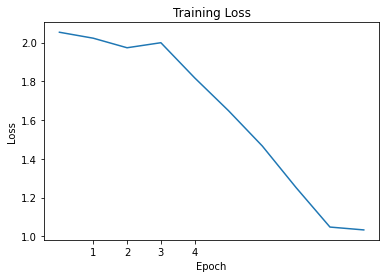

In [ ]:
df_stats = pd.DataFrame(data=training_stats)
plt.plot(df_stats['Training Loss'], label="Training")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([1, 2, 3, 4])
plt.show()

In [ ]:
test_texts = test.CONTEXT.values
test_labels = test.label.values

input_ids = []
attention_masks = []

for text in test_texts:
    encoded_dict = tokenizer.encode_plus(
                        text,                     
                        add_special_tokens = True, 
                        max_length = max_len,          
                        pad_to_max_length = True,
                        return_attention_mask = True,  
                        return_tensors = 'pt',   
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(test_labels)

batch_size = 32  

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


-----------------------------------------------------------------------------------------------------------------------------------
- https://medium.com/@toprakucar/bert-modeli-ile-t%C3%BCrk%C3%A7e-metinlerde-s%C4%B1n%C4%B1fland%C4%B1rma-yapmak-260f15a65611

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.4 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import torch
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig, Adafactor
from transformers import get_linear_schedule_with_warmup
import datetime
import random
import seaborn as sns
import numpy as np
import time
import matplotlib.pyplot as plt


from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-128k-uncased', do_lower_case=True)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datas/cleanBankData2.csv")
df

,name,link,label,text
0,MOOV Mov Uyarı Vermeden Kısıtlama Getirdi,https://www.sikayetvar.com/moov/moov-mov-uyari...,Kredi İşlemleri,moov ad araç kiralamak şirket sürek araç kiral...
1,Ziraat Bankası Bankkart Arka Yüzündeki Kredi K...,https://www.sikayetvar.com/ziraat-bankasi/zira...,Kredi İşlemleri,ziraat banka bankkart kart kredi kart alışveri...
2,Hepsiburada.com Sipariş İptaliyle 500 TL Zarar...,https://www.sikayetvar.com/hepsiburada/hepsibu...,Kredi İşlemleri,22 ara 2022 tarih hepsiburadacomdan yapmak 475...
3,Ziraat Bankası Borç Ödeme Sorunu,https://www.sikayetvar.com/ziraat-bankasi/zira...,Kredi İşlemleri,banka kart par olmak rağmen kredi kart bor öde...
4,Ziraat Bankası Bloke Açma Sorunu,https://www.sikayetvar.com/ziraat-bankasi/zira...,Kredi İşlemleri,ziraat banka kredi bor dolay hesap bloke koyma...
...,...,...,...,...
246407,KKB'de Borçlarım Ödenmedi Gözüküyor,https://www.sikayetvar.com/kredi-kayit-burosu/...,KKB Skor,2011 yıl çeşit banka borç var var şirket aracı...
246408,İş Bankası İlgisizliği!,https://www.sikayetvar.com/is-bankasi/is-banka...,KKB Skor,2010 yıl açtırdığım 2015 yıl kapanan kredi kar...
246409,Garanti Bankası Her Şey Gönlünüzce Olsun!,https://www.sikayetvar.com/garanti-bbva/garant...,KKB Skor,merhaba müşteri no 16790602 kkb 1589 3 ay şâhı...
246410,ING Bank Ticari Kredi Kartı Alamıyorum!,https://www.sikayetvar.com/ing/ing-bank-ticari...,KKB Skor,yaklaşık 1 yıldır pos hesap kul kkb puan yeter...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246412 entries, 0 to 246411
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    246412 non-null  object
 1   link    246412 non-null  object
 2   label   246412 non-null  object
 3   text    246412 non-null  object
dtypes: object(4)
memory usage: 7.5+ MB


In [ ]:
df["CONTEXT"] = df["name"]+". "+df["text"]
df.head()

,name,link,label,text,CONTEXT
0,MOOV Mov Uyarı Vermeden Kısıtlama Getirdi,https://www.sikayetvar.com/moov/moov-mov-uyari...,Kredi İşlemleri,moov ad araç kiralamak şirket sürek araç kiral...,MOOV Mov Uyarı Vermeden Kısıtlama Getirdi. moo...
1,Ziraat Bankası Bankkart Arka Yüzündeki Kredi K...,https://www.sikayetvar.com/ziraat-bankasi/zira...,Kredi İşlemleri,ziraat banka bankkart kart kredi kart alışveri...,Ziraat Bankası Bankkart Arka Yüzündeki Kredi K...
2,Hepsiburada.com Sipariş İptaliyle 500 TL Zarar...,https://www.sikayetvar.com/hepsiburada/hepsibu...,Kredi İşlemleri,22 ara 2022 tarih hepsiburadacomdan yapmak 475...,Hepsiburada.com Sipariş İptaliyle 500 TL Zarar...
3,Ziraat Bankası Borç Ödeme Sorunu,https://www.sikayetvar.com/ziraat-bankasi/zira...,Kredi İşlemleri,banka kart par olmak rağmen kredi kart bor öde...,Ziraat Bankası Borç Ödeme Sorunu. banka kart p...
4,Ziraat Bankası Bloke Açma Sorunu,https://www.sikayetvar.com/ziraat-bankasi/zira...,Kredi İşlemleri,ziraat banka kredi bor dolay hesap bloke koyma...,Ziraat Bankası Bloke Açma Sorunu. ziraat banka...


In [ ]:
df = df.drop(["name", "link", "text"], axis = 1)
df.head()

,label,CONTEXT
0,Kredi İşlemleri,MOOV Mov Uyarı Vermeden Kısıtlama Getirdi. moo...
1,Kredi İşlemleri,Ziraat Bankası Bankkart Arka Yüzündeki Kredi K...
2,Kredi İşlemleri,Hepsiburada.com Sipariş İptaliyle 500 TL Zarar...
3,Kredi İşlemleri,Ziraat Bankası Borç Ödeme Sorunu. banka kart p...
4,Kredi İşlemleri,Ziraat Bankası Bloke Açma Sorunu. ziraat banka...


In [ ]:
!nvidia-smi

Thu Feb  2 06:58:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    30W /  70W |   4632MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
df.label.value_counts()

Kart İşlemleri        37296
Kredi İşlemleri       36904
Diğer                 36626
Hesap İşlemleri       36504
Kargo                 35392
Limit                 30802
Müşteri Temsilcisi    20266
KKB Skor              12622
Name: label, dtype: int64

In [ ]:
le = LabelEncoder()
df.label = le.fit_transform(df.label)
df.head()

,label,CONTEXT
0,5,MOOV Mov Uyarı Vermeden Kısıtlama Getirdi. moo...
1,5,Ziraat Bankası Bankkart Arka Yüzündeki Kredi K...
2,5,Hepsiburada.com Sipariş İptaliyle 500 TL Zarar...
3,5,Ziraat Bankası Borç Ödeme Sorunu. banka kart p...
4,5,Ziraat Bankası Bloke Açma Sorunu. ziraat banka...


In [ ]:
df.label.value_counts()

4    37296
5    36904
0    36626
1    36504
3    35392
6    30802
7    20266
2    12622
Name: label, dtype: int64

In [ ]:
training = df.groupby("label").apply(lambda x: x.sample(frac = 0.8))
test = pd.concat([df, training]).drop_duplicates(keep = False)
test

,label,CONTEXT
7,5,Ziraat Bankası Onaylanan Kredi Tutarı. temel i...
21,5,Akbank Axess Yanıltıcı Kampanya Yapıyor Ve Uym...
28,5,VakıfBank'tan Kredi Çekenlere Durumum Örnek Ol...
31,5,Ziraat Bankası Kredi Kartı Limit. merhaba bank...
36,5,Ziraat Bankası Kk Tahsilatı Nedir. ben ziraat ...
...,...,...
231739,3,Passolig Sorumsuzluk. Başka Bir Şey Değil. pas...
232107,3,Sürat Kargo Kargonun Teslim Edilmemesi. hatay ...
232257,3,Sürat Kargo Kayıt Bulunama Di Hatası. surat ka...
233322,3,Kuryenet Teslim Edilemeyen Ürün. kuryenet turk...


In [ ]:
res = test.groupby("CONTEXT")["label"].count().sum()
res

16870

In [ ]:
len(training), len(test)

(197131, 16870)

In [ ]:
train_texts = training.CONTEXT.values
train_labels = training.label.values 
train_labels

array([0, 0, 0, ..., 7, 7, 7])

In [ ]:
input_ids = []
attention_masks = []
max_len = 100


for text in train_texts:
    encoded_dict = tokenizer.encode_plus(
                        str(text),                     
                        add_special_tokens = True,
                        max_length = max_len,      
                        pad_to_max_length = True,
                        return_attention_mask = True, 
                        return_tensors = 'pt',
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

print('Original: ', train_texts[0])
print('Token IDs:', input_ids[0])

Original:  Kredi Kayıt Bürosu Sicil Affı Kredi Puanı. birey banka sicil af kanu dâhil 02112022de yürürlük giren kanu madde tarih 5411 sayıl kanu 1 madde uyarınca karşı çek protesto senet kredi kredi kart borç ilişkin kayıt dikkat alınmaması hak kanu aşağı geçici mad
Token IDs: tensor([     2,   4139,   3621,   2312,   4086,  12094,  36238,   4139,  11056,
            18,   4632,   3730,  12094,   3285,   2476,   1012,   3931,   5621,
          8215, 115459,   1045,   1942,   6131,  30562,   5485,   2476,   1012,
          3077,   2388, 127610,  23282,   2476,   1012,     21,   3077,   8697,
         40209,  15012,   8306,  11194,   4139,   4139,   4219,   9271,  89805,
          3621,   2868,  33468,   2254,   2476,   1012,  10892,   2893,   3538,
          3213,   2690,      3,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
  

In [ ]:
train_dataset = TensorDataset(input_ids, attention_masks, labels)

In [ ]:
batch_size = 16

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), 
            batch_size = batch_size 
        )

In [ ]:
number_of_categories = len(df['label'].unique())
number_of_categories

8

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "dbmdz/bert-base-turkish-128k-uncased",
    num_labels = number_of_categories, 
    output_attentions = False,
    output_hidden_states = False,
)

model.cuda()

Some weights of the model checkpoint at dbmdz/bert-base-turkish-128k-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassificatio

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(128000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
epochs = 8 

optimizer = torch.optim.Adam(model.parameters(),
                  lr = 5e-5,
                  eps = 1e-8 
                )

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
seed_val = 3000

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()

for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    t0 = time.time()
    total_train_loss = 0
    model.train()
    
    for step, batch in enumerate(train_dataloader):
        if step % 10 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        
        output = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        loss = output['loss']
        logits = output['logits']
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    training_time = format_time(time.time() - t0)

    print("Average training loss: {0:.2f}".format(avg_train_loss))
    print("Training epoch took: {:}".format(training_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Training Time': training_time,
        }
    )

print("Training completed in {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

======== Epoch 1 / 8 ========
Batch    10  of  1,055.    Elapsed: 0:00:06.
Batch    20  of  1,055.    Elapsed: 0:00:09.
Batch    30  of  1,055.    Elapsed: 0:00:12.
Batch    40  of  1,055.    Elapsed: 0:00:15.
Batch    50  of  1,055.    Elapsed: 0:00:17.
Batch    60  of  1,055.    Elapsed: 0:00:20.
Batch    70  of  1,055.    Elapsed: 0:00:23.
Batch    80  of  1,055.    Elapsed: 0:00:26.
Batch    90  of  1,055.    Elapsed: 0:00:29.
Batch   100  of  1,055.    Elapsed: 0:00:32.
Batch   110  of  1,055.    Elapsed: 0:00:35.
Batch   120  of  1,055.    Elapsed: 0:00:38.
Batch   130  of  1,055.    Elapsed: 0:00:41.
Batch   140  of  1,055.    Elapsed: 0:00:44.
Batch   150  of  1,055.    Elapsed: 0:00:47.
Batch   160  of  1,055.    Elapsed: 0:00:50.
Batch   170  of  1,055.    Elapsed: 0:00:53.
Batch   180  of  1,055.    Elapsed: 0:00:56.
Batch   190  of  1,055.    Elapsed: 0:00:59.
Batch   200  of  1,055.    Elapsed: 0:01:02.
Batch   210  of  1,055.    Elapsed: 0:01:05.
Batch   220  of  1,055.  

In [ ]:
tokenizer.save_pretrained("/content/drive/MyDrive/models/bert-bank-tokenizer")
model.save_pretrained("/content/drive/MyDrive/models/bert-bank-model")

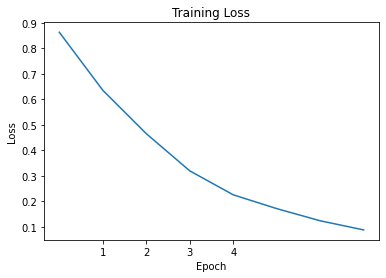

In [ ]:
df_stats = pd.DataFrame(data=training_stats)
plt.plot(df_stats['Training Loss'], label="Training")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([1, 2, 3, 4])
plt.show()

In [ ]:
test_texts = test.CONTEXT.values
test_labels = test.label.values

input_ids = []
attention_masks = []

for text in test_texts:
    encoded_dict = tokenizer.encode_plus(
                        text,                     
                        add_special_tokens = True, 
                        max_length = max_len,          
                        pad_to_max_length = True,
                        return_attention_mask = True,  
                        return_tensors = 'pt',   
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(test_labels)

batch_size = 32  

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
print('Prediction started on test data')
model.eval()
predictions , true_labels = [], []

for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  predictions.append(logits)
  true_labels.append(label_ids)

print('Prediction completed')

Prediction started on test data
Prediction completed


In [ ]:
prediction_set = []

for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  prediction_set.append(pred_labels_i)

prediction_scores = [item for sublist in prediction_set for item in sublist]

In [ ]:
f_score = f1_score(test_labels, prediction_scores, average='macro')
precision = precision_score(test_labels, prediction_scores, average='macro')
recall = recall_score(test_labels, prediction_scores, average='macro')
accr = accuracy_score(test_labels, prediction_scores)

In [ ]:
print("F-Score: ", f_score)
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accr)

F-Score:  0.9799727481797514
Recall:  0.9805662733081533
Precision:  0.9794795142965443
Accuracy:  0.9823355068168346


In [ ]:
report = pd.DataFrame(classification_report(test_labels, prediction_scores, output_dict=True))

In [ ]:
report = report.rename(columns={
                                '0':'Kart İşlemleri',
                                '1':'Kredi İşlemleri',
                                '2':'Diğer',
                                '3':'Hesap İşlemleri',
                                '4': 'Kargo',
                                '5': 'Limit',
                                '6': 'Müşteri Temsilcisi',
                                '7': 'KKB Skor'})

report

,Kart İşlemleri,Kredi İşlemleri,Hesap İşlemleri,Kargo,Limit,Müşteri Temsilcisi,KKB Skor,accuracy,macro avg,weighted avg
precision,0.977292,0.971119,0.985294,0.953096,0.988616,0.989115,0.991824,0.982336,0.979480,0.982527
recall,0.978114,0.960714,0.985294,0.986348,0.978590,0.982224,0.992679,0.982336,0.980566,0.982336
f1-score,0.977703,0.965889,0.985294,0.969437,0.983577,0.985657,0.992251,0.982336,0.979973,0.982374
support,1188.000000,280.000000,68.000000,2637.000000,6212.000000,4163.000000,2322.000000,0.982336,16870.000000,16870.000000


In [ ]:
!cd /content/drive/MyDrive/models/
!ls

drive  sample_data


In [ ]:
from transformers import BertTokenizer,BertTokenizerFast, TFBertForSequenceClassification, BertConfig, TFBertModel
config = BertConfig.from_json_file("/content/drive/MyDrive/models/bert-bank-model/config.json")
model_path = "/content/drive/MyDrive/models/bert-bank-model"
tokenizer_path = "/content/drive/MyDrive/models/bert-bank-model"
#model = TFBertModel.from_pretrained(model_path, from_pt=True, config=config)
model = TFBertForSequenceClassification.from_pretrained(model_path, from_pt=True) # modify labels as needed.
model

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
tokenizer = BertTokenizer.from_pretrained("/content/drive/MyDrive/models/bert-bank-tokenizer")
model = TFBertForSequenceClassification.from_pretrained(model_path, from_pt=True) # modify labels as needed.

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
from transformers import TextClassificationPipeline

text = ["Kredimi ödemek için Akbank mobile girmeye çalışıyorum. Şifrem blokeli kart şifresi istiyor kartı kullanmadığım için şifrem yok müşteri hizmetlerine bağlanamıyorum. Akbank tarafından bu saçma duruma bir çözüm bulunmasını rica ediyorum illa bankaya gidip kart kullanmak zorunda değiliz geçin bunları bö...",
        "VakıfBank hesabımda mevcut bir ihtiyaç kredim varken ikinci bir ihtiyaç kredisi çektim (çünkü ihtiyacım var). Paranın aktarılacağı hesabı seçtim ve para hesabıma aktarıldı. Ne olduysa ondan sonra oldu. Hesabımda şu anda \"para çekilemez blokesi bulunmaktadır\" Uyarısı alıyorum ve inanın nedenini bilmi..",
        "28 Ocak günü yani cumartesi Akbank a üye oldum. Migros davet kodu ile 30 Ocak tarihinde de hesabımı onayladım diğer banka hesabımdan para atarak bunlar iyi güzel hoş Akbank a üye olurken Migros davet kodu girince 300 lira çek verilmesi gerekiyordu. Kodum hala SMS ile tarafıma iletilmedi. Akbank a ",
        "ING Bank tan kredi başvurusu yaptım. Kredim onaylanmadı tamam dedim tabi bu arada bana bilgim dışında hesap açılmış bana söylendiğinde ben de hesabı neden açtınız dedim oda hesap açmadan bakamadığını söyledi bende kapatın hesabı dedim ve kapattı. Ben öyle sanıyorum bugün bana ING den mesaj",
        "Hiç bilmediğim bir kargo geldi ben istemedim çalışıyordum kargocu kapıya gelmiş ararken yoğunluktan cevap vermedim eşim kargoyu almış 2 tane Tozlu pis parfüm böyle kurumsal bir firma MNG Kargo şubeye gittim gönderici numarasını verdi ulaşılmıyor fatura yok",
       "Sonu 5176 ile biten Maximum kredi kartım var. İş Bankası anlaşmalı olduğu kamu kurumu çalışanıyım. Kurum anlaşma yaptıktan sonra kartlarımızı dağıtırken bana 4.000 (dörtbin) tl limitli Maximum kredi kartı verdiler. Limitinin düşük olduğunu söyledim banka yetkilisine. Bana başka bankadaki limitimi dü...",
       '30.01.2023 tarihinde araç satış işlemleri için alıcı tarafın kredi işlemleri için Van İpekyolu Ziraat Bankası şubesine gittiğimizde Müşteri temsilcisinin alıcı tarafa öğleye kadar noter işlemlerinin gerçekleşecek şubeye gelinmesi halinde kredi işlemlerinin yapılacağını beyan etmesi üzerine noter işl...',
       'Bireysel bankacılık ve sicil affı kanunu dahilinde 07.10.2022\'de yürürlüğe giren kanun ile madde tarihli ve 5411 sayılı kanunun 1. Maddesi uyarınca karşılıksız çek ve protestolu senetler ile kredi ve kredi kartları borçlarına ilişkin kayıtların dikkate alınmaması hakkında kanuna aşağıdaki geçici mad...',
]

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer)

In [ ]:
[print(f"{text[index]} - {i['label']}") for index, i in enumerate(pipe(text))]
'''
Kart İşlemleri        4
Kredi İşlemleri       5
Diğer                 0
Hesap İşlemleri       1
Kargo                 3
Limit                 6
Müşteri Temsilcisi    7
KKB Skor              2
'''

Kredimi ödemek için Akbank mobile girmeye çalışıyorum. Şifrem blokeli kart şifresi istiyor kartı kullanmadığım için şifrem yok müşteri hizmetlerine bağlanamıyorum. Akbank tarafından bu saçma duruma bir çözüm bulunmasını rica ediyorum illa bankaya gidip kart kullanmak zorunda değiliz geçin bunları bö... - LABEL_4
VakıfBank hesabımda mevcut bir ihtiyaç kredim varken ikinci bir ihtiyaç kredisi çektim (çünkü ihtiyacım var). Paranın aktarılacağı hesabı seçtim ve para hesabıma aktarıldı. Ne olduysa ondan sonra oldu. Hesabımda şu anda "para çekilemez blokesi bulunmaktadır" Uyarısı alıyorum ve inanın nedenini bilmi.. - LABEL_5
28 Ocak günü yani cumartesi Akbank a üye oldum. Migros davet kodu ile 30 Ocak tarihinde de hesabımı onayladım diğer banka hesabımdan para atarak bunlar iyi güzel hoş Akbank a üye olurken Migros davet kodu girince 300 lira çek verilmesi gerekiyordu. Kodum hala SMS ile tarafıma iletilmedi. Akbank a  - LABEL_0
ING Bank tan kredi başvurusu yaptım. Kredim onaylanmadı tamam de

'\nKart İşlemleri        4\nKredi İşlemleri       5\nDiğer                 0\nHesap İşlemleri       1\nKargo                 3\nLimit                 6\nMüşteri Temsilcisi    7\nKKB Skor              2\n'

In [ ]:
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 4.9 MB/s eta 0:00:00


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) y
Token is valid.
Cannot authenticate through git-credential as no help

In [ ]:
from huggingface_hub import create_repo
create_repo("elifftosunn/Bert-Bank-Model")

RepoUrl('https://huggingface.co/elifftosunn/Bert-Bank-Model', endpoint='https://huggingface.co', repo_type='model', repo_id='elifftosunn/Bert-Bank-Model')

In [3]:
from transformers import AutoTokenizer, TextClassificationPipeline, TFBertForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("elifftosunn/Bert-Bank-Model")
model = TFBertForSequenceClassification.from_pretrained("elifftosunn/Bert-Bank-Model", from_pt=True)
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer)

print(pipe('QNB Finansbank 1.39 oranlı 50.000 TL yeni müşterilere özel ihtiyaç kredisi 1.92 oranında veriyor amaç hesap açtırmak kampanyanın hiçbir gerçekçiliği yoktur. Resmen milletle dalga geçiyorsunuz. Ne demek oluyor bu. 1,39 dan kredi deyip içeriğine girince 2 katına çıkıyor. Böyle saçma bir banka'))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


[{'label': 'Kredi İşlemleri', 'score': 0.9589990377426147}]
